In [2]:
using Plots
include("coevolution_network_base.jl")
using .CoevolutionNetworkBase
theme(:dracula)
using Profile

In [13]:
# Parameters
L = 40.0
dx = 0.3
x = -L/2:dx:L/2-dx
r = 3.0
M = 15
beta = 2.5
alpha = 1.0
gamma = 0.0
D = 0.01
Nh = 2 * 10^6

# Initialize viral and immune densities
viral_density = zeros(Float64, length(x))
viral_density[Int(round(length(x)/2))] = 100/dx
viral_density2 = zeros(Float64, length(x))
immune_density = zeros(Float64, length(x))

# Create Population instances
population = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)
population2 = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true)
# populations = [population, population2]
populations = [Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density2, immune_density; stochastic=true, sigma = 7) for _ = 1:15] 
println(size(populations,1))

populations[1] = Population(L, dx, r, M, beta, alpha, gamma, D, Nh, viral_density, immune_density;stochastic=true)

# Create Network instance
migration_matrix = 1e-5 * rand(size(populations,1),size(populations,1)) # Define an appropriate migration matrix
println(size(migration_matrix,1))
network = Network(populations, migration_matrix)

# Create Simulation instance
dt = 0.05 # Define an appropriate time step size
duration = 80.3 # Define an appropriate simulation duration
simulation = Simulation(network, dt, duration; thin_by=20)

using Profile
@timed begin
    # single_step_evolve!(population,dt)
    run_simulation!(simulation)
end

# Profile.print(format=:flat)
# Profile.clear()
# println(length(simulation.duration_times))
# plot(population.xs, population.viral_density)

15
15


(value = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0], time = 19.6715488, bytes = 736, gctime = 0.0, gcstats = Base.GC_Diff(736, 0, 0, 1, 0, 0, 0, 0, 0))

In [14]:
tot_inf_per_deme = calculate_total_infected_per_deme(simulation)
ant_var_per_deme = calculate_antigenic_variance_per_deme(simulation)

15×81 Matrix{Float64}:
 0.0  0.0240367  0.0429708  0.0679258  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0        …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0        …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0        0.0        0.0           0.0  0.0  0.0  0.0  0.0

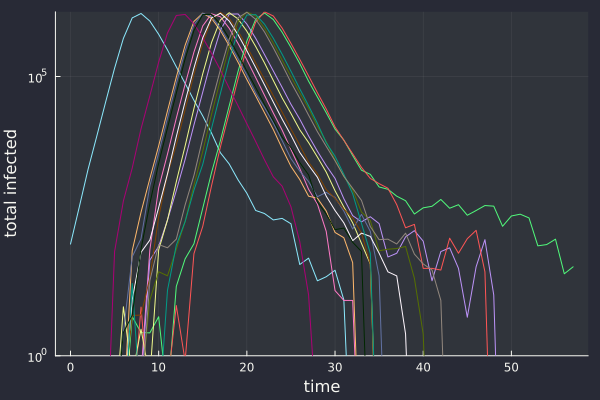

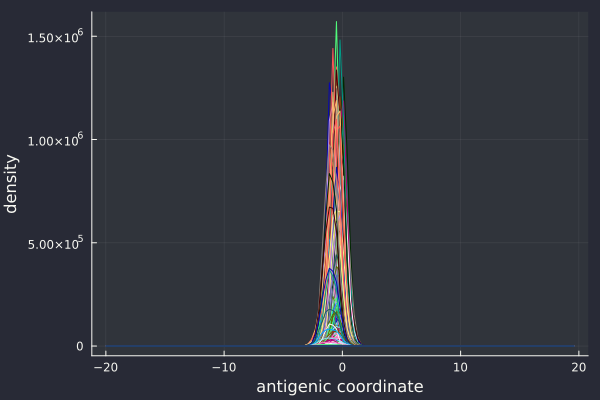

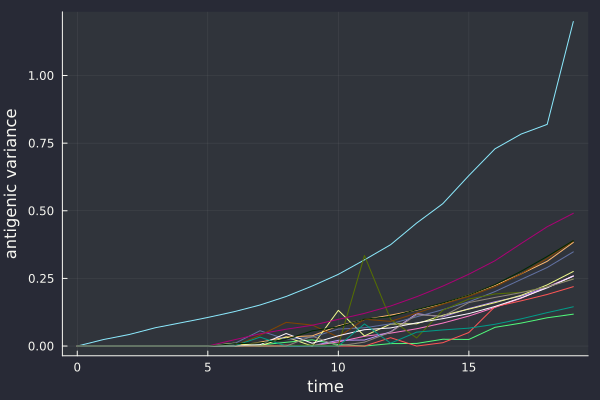

In [15]:
p = plot(xlabel="time",ylabel="total infected", yscale=:log10, legend=:none, ylim=[1, Inf])
for i = 1:size(tot_inf_per_deme,1)
    reg = tot_inf_per_deme[i,:] .> 0
    plot!(p, simulation.duration_times[reg], tot_inf_per_deme[i,reg])
end
display(p)

p2 = plot(xlabel="antigenic coordinate", ylabel = "density", legend=:none)
for i = 1:size(tot_inf_per_deme,1)
    for j = 1:length(simulation.duration_times)
        plot!(p2, simulation.trajectory[j].populations[i].xs, simulation.trajectory[j].populations[i].viral_density)
    end
end
display(p2)

p3 = plot(xlabel="time", ylabel="antigenic variance", legend=:none)
reg = simulation.duration_times.<20
for i = 1:size(tot_inf_per_deme,1)
    plot!(p3, simulation.duration_times[reg], ant_var_per_deme[i,reg])
end
display(p3)

In [6]:
populations[1].sigma

4.47213595499958

In [ ]:
collect(1:3:20)

In [ ]:
mod(2,4)